In [1]:
# 使用Kmeans对图像进行分割
# @ Original Author: chen yang
import numpy as np
import PIL.Image as image
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
# 加载图像，对数据进行规范化
def load_data(filePath):
    file = open(filePath,"rb")
    img = image.open(file) # 得到图像像素值
    width, height = img.size # 得到图像尺寸
    data = []
    for x in range(width):
        for y in range(height):
            # 得到点(x,y)的三个通道值
            c1,c2,c3 = img.getpixel((x,y))
            data.append([c1,c2,c3])
    file.close()
    # 使用Min-Max进行规范化
    scaler = preprocessing.MinMaxScaler()
    data = scaler.fit_transform(data)
    return np.mat(data),width,height

In [4]:
# 加载图像，得到规范化的结果img，以及图像尺寸
img, width, height = load_data("image.jpg")

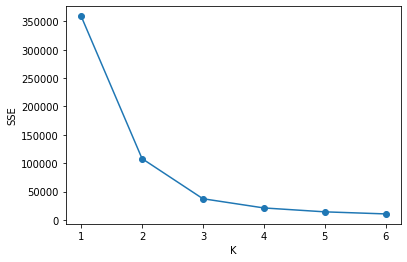

In [6]:
# 改动：使用手肘法寻找k的合适值
# 统计不同k取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1,7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x = range(1,7)
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(x,sse,'o-')
plt.show()

In [7]:
# 使用K-Means对图像进行2聚类
kmeans = KMeans(n_clusters=2)
kmeans.fit(img)
label = kmeans.predict(img)
print("生成分割结果")
label = label.reshape([width,height])
pic_mark = image.new("L",(width,height))
for x in range(width):
    for y in range(height):
        pic_mark.putpixel((x,y),int(256/(label[x][y]+1))-1)
pic_mark.save("image_kmeans.jpg","JPEG")

生成分割结果
